# How to use the TC custom dataframes
* Lara Tobias-Tarsh (laratt@umich.edu)
* Created: 16/03/2023

This tutorial should cover how to use the custom data classes that I created for storing tropical cyclone (TC) track data from the Thorpex Grand Global Ensemble (TIGGE) and the HURDAT2 best track archive. This should dramatically simplify how information is stored in verification and also allows for some basic verification and comparison calculations to be done relatively simply.

In my (lazy) opinion, this is way easier than having all the data floating around in a bunch of random functions and csv files :).

### Initialising a cyclone object

The first step to using the TC custom dataframes is to import the track_error module. Think of this like a C++ .h file from 101, or like a python library. Once you import the module, you can use it like you would use a python library (e.g. numpy). 


You need to have the module in the same directory as the notebook you are working in to use it, so work in the errorCalcModules directory when you are doing analysis, or define a filepath to the module before you import it.


You need all of the imports below to do this, as they are dependecies for the cyclone module itself.

In [1]:
# perform imports
import numpy as np
import track_error as te # the name you use to import this is arbitrary, I just used te bc it is an easy shorthand

Once you have your imports, you can start to initialise your Cyclone objects. 

The only important thing here is the way your csv files are stored in their directories. You need to have each TC's csv files stored in a seperate directory so that the string parsing can work correctly. I will probably fix this at some point so that it can be done by just storing everything in one directory, but right now I can't be bothered to write the function... (sorry ANL...)


I have organised the files on the github repo the same way that I have organised the files on my laptop when I tested all the code (TBA...), so if you clone the repo exactly you should have 0 problems with this. If you want to do this from scratch, you want to change the directory structure, or you have other models you want to include, this is how I have my directories structured:


```
.../tcTracks/cycName/stormName-year-month-day-hour.csv
```

All TIGGE tracks should be stored this way because the function uses the directory name to extract the name and year of the storm. I think this is a useful and organised way to store all of the data anyway, so I doubt I will change the syntax as it stops me getting lazy with file organisation while letting me be a lazy coder :)


All you need to do to initialise a cyclone object is call the cyclone constructor, called generate_cyclone(). This takes only a filepath to a directory as an argument and does all of the work for you from there.

In [5]:
# here we initialise one cyclone
filepath = "/Users/laratobias-tarsh/Documents/clim323-final/tcTracks/Bertha"
cyclone = te.generate_cyclone(filepath)
cyclone

# Note issues with Teddy (had to hardcode the TC identifier), Dolly, Wilfred, Omar, Eta

reading file: Bertha-2020-05-27-12.csv
reading file: Bertha-2020-05-28-00.csv


/Users/laratobias-tarsh/opt/anaconda3/envs/tcVerification/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/laratobias-tarsh/opt/anaconda3/envs/tcVerification/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Cyclone(name='Bertha', year=2020, ecmwf=Model(runs=[Track(forecasts=[Forecast(time=Timestamp('2020-05-27 12:00:00'), lat=32.5, lon=-79.5, mslp=1009, vmax=35, track_error=11.119492664455889, intensity_error=4), Forecast(time=Timestamp('2020-05-27 18:00:00'), lat=33.4, lon=-80.1, mslp=1009, vmax=28, track_error=33.358477993368375, intensity_error=2), Forecast(time=Timestamp('2020-05-28 00:00:00'), lat=34.9, lon=-80.7, mslp=1009, vmax=22, track_error=0.0, intensity_error=1), Forecast(time=Timestamp('2020-05-28 06:00:00'), lat=36.1, lon=-81.2, mslp=1013, vmax=19, track_error=111.55266150470123, intensity_error=2), Forecast(time=Timestamp('2020-05-28 12:00:00'), lat=39.4, lon=-81.3, mslp=1013, vmax=16, track_error=81.74764904995337, intensity_error=2)], mean_terror=47.55565624249577, mean_ierror=2.2)], brier_skill_score=[], errors=(47.55565624249577, 2.2)), gfs=Model(runs=[], brier_skill_score=[], errors=(nan, nan)), best_track=Track(forecasts=[Position(time=datetime.datetime(2020, 5, 27, 6

### Acessing data in the object

The TC object is a bunch of classes thrown together to create a 'Cyclone object' which contains all of the information for each storm. It is kind of like a custom matrix or dictionary with a bunch of lists inside it. This is why just printing it looks gross.

The nice thing about this format is you can just use dot indexing to find things and means that you don't have loads of lists that you have to index logically or numerically floating around. It is therefore WAY easier to keep track of all of the data for each system.

The object has a ton of attributes and methods that can be called to perform various operations, including embedded functions. We will start with the cyclone itself. This is the main frame that contains all the other lists of data. It also lets us see some summary statistics of the storm:

Tropical Cyclone Bertha:
formation date: 2020-05-27, 06:00
dissipation date: 2020-05-28, 12:00
Best Track: [(-78.8, 31.5), (-79.5, 32.6), (-79.7, 32.9), (-80.1, 33.7), (-80.7, 34.9), (-81.1, 37.1), (-80.6, 39.9)]
ECMWF Mean Total Track Error: 47.55565624249577
GFS Mean Total Track Error: nan
ECMWF Mean Total Intensity Error: 2.2
GFS Mean Total Intensity Error: nan
Best track map for TC Bertha: 


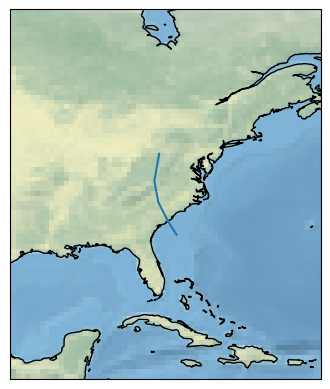

In [6]:
# See storm summary:
cyclone.print_summary()

# See storm best track:
cyclone.track_map()


The next thing you want to look at is the individual model runs. They should be ordered chronologically, so the first run in the list is the first time the model was initialised and so on. They each contain some simple error statistics for the speciific run, and the individual coordinates of the storm at each forecast hour. 

You can access these in the runs attribute of the cyclone object, and then index into them like you would any other list:

In [7]:
# Lets look at the first ECMWF run for this system:
cyclone.ecmwf.runs[0]

Track(forecasts=[Forecast(time=Timestamp('2020-05-27 12:00:00'), lat=32.5, lon=-79.5, mslp=1009, vmax=35, track_error=11.119492664455889, intensity_error=4), Forecast(time=Timestamp('2020-05-27 18:00:00'), lat=33.4, lon=-80.1, mslp=1009, vmax=28, track_error=33.358477993368375, intensity_error=2), Forecast(time=Timestamp('2020-05-28 00:00:00'), lat=34.9, lon=-80.7, mslp=1009, vmax=22, track_error=0.0, intensity_error=1), Forecast(time=Timestamp('2020-05-28 06:00:00'), lat=36.1, lon=-81.2, mslp=1013, vmax=19, track_error=111.55266150470123, intensity_error=2), Forecast(time=Timestamp('2020-05-28 12:00:00'), lat=39.4, lon=-81.3, mslp=1013, vmax=16, track_error=81.74764904995337, intensity_error=2)], mean_terror=47.55565624249577, mean_ierror=2.2)

This is a track object, which is just a list of datapoints about the cyclone, and the run's specific mean track error and mean intensity error. We can unpack this further to see how it works:

In [8]:
# Lets examine the summary statistics
meanTrackError = cyclone.ecmwf.runs[0].mean_terror
meanIntensityError = cyclone.ecmwf.runs[0].mean_ierror

print(f'Mean Track Error {meanTrackError}')
print(f'Mean Intensity Error: {meanIntensityError}')

# Now we look at the positions themselves. We break these down like so:
cyclone.ecmwf.runs[0].forecasts[0]

Mean Track Error 47.55565624249577
Mean Intensity Error: 2.2


Forecast(time=Timestamp('2020-05-27 12:00:00'), lat=32.5, lon=-79.5, mslp=1009, vmax=35, track_error=11.119492664455889, intensity_error=4)

Here we have a position from the TIGGE archive for the system at a specific time. We can use . indexing to access all of these statistics individually as well if we want to. If you change this . index to either time, lat, lon, mslp, vmax, track_error or intensity_error you will be able to directly access this datum. 

Try changing it in the cell below to make sure it works.

In [9]:
cyclone.ecmwf.runs[0].forecasts[0].track_error

11.119492664455889